# RAM y CPU

In [1]:
import psutil
import time
import csv
from datetime import datetime, timedelta

# PID del proceso que deseas monitorear
PID_OBJETIVO = 31528  # PID proceso

# Intervalo de muestreo en segundos
INTERVALO = 1.0

# Duración total del monitoreo (en minutos)
DURACION_MINUTOS = 10

# Nombre del archivo de salida
nombre_csv = f"uso_cpu_ram_{PID_OBJETIVO}.csv"

# Obtener el proceso
try:
    proceso = psutil.Process(PID_OBJETIVO)
except psutil.NoSuchProcess:
    print(" No existe un proceso con ese PID.")
    exit()

# Tiempo de fin
tiempo_inicio = datetime.now()
tiempo_fin = tiempo_inicio + timedelta(minutes=DURACION_MINUTOS)

# Crear archivo CSV y escribir encabezado
with open(nombre_csv, mode='w', newline='') as archivo:
    escritor = csv.writer(archivo)
    escritor.writerow(['Timestamp', 'CPU (%)', 'RAM (MB)'])

    print(f" Monitoreando PID {PID_OBJETIVO} durante {DURACION_MINUTOS} minutos...")
    try:
        while datetime.now() < tiempo_fin:
            cpu = proceso.cpu_percent(interval=None)  # % de CPU desde la última llamada
            ram = proceso.memory_info().rss / (1024 * 1024)  # RAM en MB
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            escritor.writerow([timestamp, cpu, ram])
            print(f"{timestamp} | CPU: {cpu:.2f}% | RAM: {ram:.2f} MB")
            time.sleep(INTERVALO)
    except KeyboardInterrupt:
        print("\n Monitoreo detenido manualmente.")
    finally:
        print(" Monitoreo finalizado. Datos guardados en:", nombre_csv)


 Monitoreando PID 31528 durante 10 minutos...
2025-06-16 23:54:03 | CPU: 0.00% | RAM: 167.34 MB
2025-06-16 23:54:04 | CPU: 7.80% | RAM: 167.34 MB
2025-06-16 23:54:05 | CPU: 9.40% | RAM: 167.35 MB
2025-06-16 23:54:06 | CPU: 9.40% | RAM: 167.36 MB
2025-06-16 23:54:07 | CPU: 1.60% | RAM: 167.37 MB
2025-06-16 23:54:08 | CPU: 7.80% | RAM: 167.38 MB
2025-06-16 23:54:09 | CPU: 6.20% | RAM: 167.39 MB
2025-06-16 23:54:10 | CPU: 13.90% | RAM: 167.34 MB
2025-06-16 23:54:11 | CPU: 6.20% | RAM: 167.34 MB
2025-06-16 23:54:12 | CPU: 6.20% | RAM: 167.34 MB
2025-06-16 23:54:13 | CPU: 3.10% | RAM: 167.34 MB
2025-06-16 23:54:14 | CPU: 3.10% | RAM: 167.34 MB
2025-06-16 23:54:15 | CPU: 4.70% | RAM: 167.34 MB
2025-06-16 23:54:16 | CPU: 4.70% | RAM: 167.34 MB
2025-06-16 23:54:17 | CPU: 3.10% | RAM: 167.34 MB
2025-06-16 23:54:18 | CPU: 1.60% | RAM: 167.34 MB
2025-06-16 23:54:19 | CPU: 4.70% | RAM: 167.34 MB
2025-06-16 23:54:20 | CPU: 6.20% | RAM: 167.34 MB
2025-06-16 23:54:21 | CPU: 7.80% | RAM: 167.34 MB
202

## Codigo pa graficar

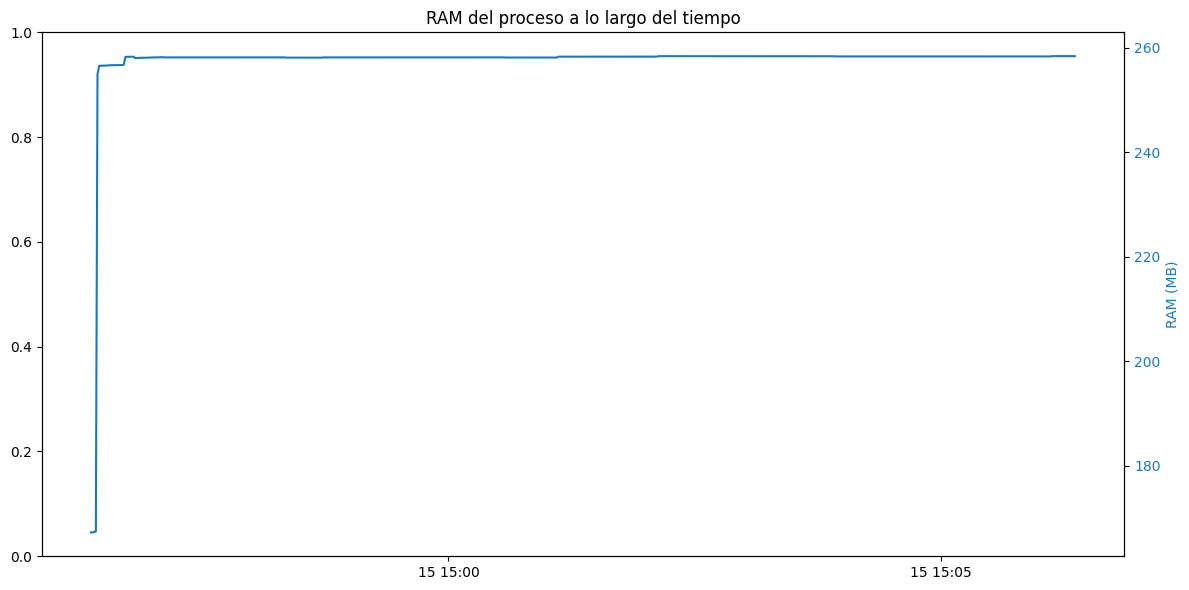

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV generado
csv_path = "uso_cpu_ram_32080.csv"  # <- cambia esto si usaste otro nombre

# Leer CSV
df = pd.read_csv(csv_path)

# Convertir la columna de tiempo a tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))


# Crear segundo eje Y para la RAM
ax2 = ax1.twinx()
ax2.set_ylabel('RAM (MB)', color='tab:blue')
ax2.plot(df['Timestamp'], df['RAM (MB)'], color='tab:blue', label='RAM (MB)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Título y formato
plt.title("RAM del proceso a lo largo del tiempo")
fig.tight_layout()

# Mostrar
plt.show()


In [7]:
import pandas as pd
import numpy as np
from scipy import stats

# Cargar datos
df = pd.read_csv("uso_cpu_ram_28752.csv")

# Calcular estadísticos para CPU
media_cpu = df['CPU (%)'].mean()
desv_cpu = df['CPU (%)'].std(ddof=1)
n = len(df)
ic_cpu = stats.t.interval(0.95, df=n-1, loc=media_cpu, scale=desv_cpu/np.sqrt(n))

# Calcular estadísticos para RAM
media_ram = df['RAM (MB)'].mean()
desv_ram = df['RAM (MB)'].std(ddof=1)
ic_ram = stats.t.interval(0.95, df=n-1, loc=media_ram, scale=desv_ram/np.sqrt(n))

# Mostrar resultados
print(f"CPU (%) - Media: {media_cpu:.2f}, IC 95%: ({ic_cpu[0]:.2f}, {ic_cpu[1]:.2f})")
print(f"RAM (MB) - Media: {media_ram:.2f}, IC 95%: ({ic_ram[0]:.2f}, {ic_ram[1]:.2f})")


CPU (%) - Media: 2.01, IC 95%: (1.84, 2.17)
RAM (MB) - Media: 246.09, IC 95%: (245.64, 246.54)


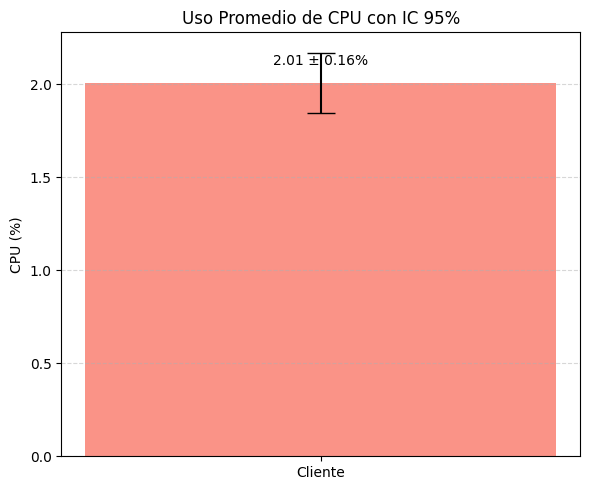

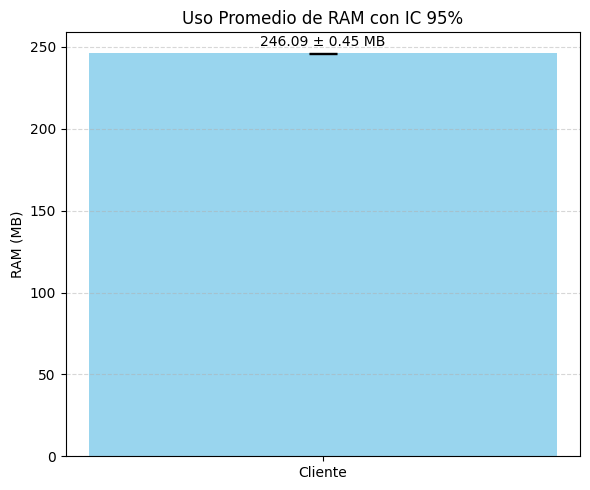

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def calcular_ic95(df, columna):
    n = len(df)
    media = df[columna].mean()
    std = df[columna].std(ddof=1)
    sem = std / np.sqrt(n)
    t_val = stats.t.ppf(0.975, df=n-1)  # IC 95%
    return media, t_val * sem

# === Cargar datos ===
cliente = pd.read_csv("uso_cpu_ram_28752.csv")

# === Calcular medias e IC para CPU ===
media_cpu_cli, ic_cpu_cli = calcular_ic95(cliente, "CPU (%)")
# === Calcular medias e IC para RAM ===
media_ram_cli, ic_ram_cli = calcular_ic95(cliente, "RAM (MB)")

# === Graficar CPU ===
plt.figure(figsize=(6, 5))
bar_cpu = plt.bar(["Cliente"], [media_cpu_cli],
                  yerr=[ic_cpu_cli], capsize=10, color='salmon', alpha=0.85)
plt.ylabel("CPU (%)")
plt.title("Uso Promedio de CPU con IC 95%")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Texto justo encima de la barra
for rect in bar_cpu:
    height = rect.get_height()
    offset = height * 0.04  # pequeño margen (2%)
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + offset,
             f"{media_cpu_cli:.2f} ± {ic_cpu_cli:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# === Graficar RAM ===
plt.figure(figsize=(6, 5))
bar_ram = plt.bar(["Cliente"], [media_ram_cli],
                  yerr=[ic_ram_cli], capsize=10, color='skyblue', alpha=0.85)
plt.ylabel("RAM (MB)")
plt.title("Uso Promedio de RAM con IC 95%")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Texto justo encima de la barra
for rect in bar_ram:
    height = rect.get_height()
    offset = height * 0.01  # pequeño margen (2%)
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + offset,
             f"{media_ram_cli:.2f} ± {ic_ram_cli:.2f} MB", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Obtener Delay

In [17]:
from opcua import Client
from time import time

client = Client("opc.tcp://127.0.0.1:4840")
client.connect()

node = client.get_node("ns=1;s=NivelTanque1")  # Ajusta el nodo

NUM_MUESTRAS = 1000
latencias = []

for _ in range(NUM_MUESTRAS):
    t0 = time()
    valor = node.get_value()
    t1 = time()
    latencias.append((t1 - t0) * 1000)  # en milisegundos

client.disconnect()

print("Promedio de latencia:", sum(latencias) / len(latencias), "ms")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


Promedio de latencia: 0.9214770793914795 ms


In [12]:
from opcua import Client, ua
from time import time
import random

# Conectar al servidor
url = "opc.tcp://127.0.0.1:4840"  #  URL del servidor OPC UA
node_id = "ns=1;s=CtrlSValve"  # Nodo a escribir

# url = "opc.tcp://10.21.162.10:4840"  #  URL del servidor OPC UA
#node_id = "ns=1;i=1001"  # Nodo a escribir


client = Client(url)
client.connect()
print("🔌 Conectado al servidor OPC UA.")

# Obtener el nodo
nodo = client.get_node(node_id)

# Número de pruebas
NUM_PRUEBAS = 20
latencias = []

print(f"✍️ Iniciando {NUM_PRUEBAS} escrituras con medición de latencia...")

for i in range(NUM_PRUEBAS):
    valor_a_escribir = random.uniform(0.0, 1.0)  # Genera un valor float en el rango [0.0, 1.0]
    variant = ua.Variant(valor_a_escribir, ua.VariantType.Double)  # Especifica que el tipo es Double

    t0 = time()
    nodo.set_value(variant)  # Escribe el valor al nodo
    t1 = time()

    latencia_ms = (t1 - t0) * 1000  # Latencia en milisegundos
    latencias.append(latencia_ms)
    print(f"Escritura #{i+1}: {latencia_ms:.3f} ms (valor: {valor_a_escribir:.3f})")

client.disconnect()

# Resultados
print("\n📊 Resultados de latencia:")
print(f" - Promedio: {sum(latencias)/len(latencias):.2f} ms")
print(f" - Mínima  : {min(latencias):.2f} ms")
print(f" - Máxima  : {max(latencias):.2f} ms")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


🔌 Conectado al servidor OPC UA.
✍️ Iniciando 5 escrituras con medición de latencia...
Escritura #1: 10.123 ms (valor: 0.525)
Escritura #2: 11.024 ms (valor: 0.610)
Escritura #3: 11.716 ms (valor: 0.143)
Escritura #4: 12.137 ms (valor: 0.763)
Escritura #5: 8.650 ms (valor: 0.308)

📊 Resultados de latencia:
 - Promedio: 10.73 ms
 - Mínima  : 8.65 ms
 - Máxima  : 12.14 ms


exception calling callback for <Future at 0x17f7ccf8b50 state=cancelled>
Traceback (most recent call last):
  File "c:\Users\andsi\AppData\Local\Programs\Python\Python311\Lib\concurrent\futures\_base.py", line 340, in _invoke_callbacks
    callback(self)
  File "c:\Users\andsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\opcua\client\ua_client.py", line 201, in clb
    response = struct_from_binary(ua.OpenSecureChannelResponse, future.result())
                                                                ^^^^^^^^^^^^^^^
  File "c:\Users\andsi\AppData\Local\Programs\Python\Python311\Lib\concurrent\futures\_base.py", line 447, in result
    raise CancelledError()
concurrent.futures._base.CancelledError
exception calling callback for <Future at 0x17f625b5a10 state=cancelled>
Traceback (most recent call last):
  File "c:\Users\andsi\AppData\Local\Programs\Python\Python311\Lib\concurrent\futures\_base.py", line 340, in _invoke_callbacks
    callback(self)
  File "c:\Users\an

In [ ]:
from opcua import Client, ua
from opcua.common import subscription
from time import time, sleep
import csv

# OPC UA Configuración
#url = "opc.tcp://10.21.162.10:4840"  #  URL del servidor OPC UA
# node_id = "ns=1;i=1001"  # Nodo a escribir
#nodo_escritura_id = "ns=1;i=1001"    # Nodo al que escribes (actuador)
#nodo_observado_id = "ns=1;i=1001" # Nodo que observas (respuesta)

url = "opc.tcp://localhost:4840"
nodo_escritura_id = "ns=1;s=CtrlBomba"    # Nodo al que escribes (actuador)
nodo_observado_id = "ns=1;s=CtrlBomba" # Nodo que observas (respuesta)

# Variables globales para medir latencia
latencias = []
latencia_pendiente = False
t0 = 0.0
cambios_detectados = 0
MAX_MUESTRAS = 100
ultimo_valor_nivel = None

# Clase para manejar eventos de la suscripción
class Handler:
    def datachange_notification(self, node, val, data):
        global latencia_pendiente, t0, cambios_detectados, ultimo_valor_nivel
        if latencia_pendiente:
            # Detectar si el valor observado ha cambiado
            if ultimo_valor_nivel is None or abs(val - ultimo_valor_nivel) > 0.01:
                t1 = time()
                latencia_ms = (t1 - t0) * 1000
                latencias.append(latencia_ms)
                cambios_detectados += 1
                print(f"Cambio detectado. Latencia: {latencia_ms:.2f} ms")
                latencia_pendiente = False
            ultimo_valor_nivel = val

# Cliente OPC UA
client = Client(url)
client.connect()
print("🔌 Conectado al servidor")

# Obtener nodos
nodo_escritura = client.get_node(nodo_escritura_id)
nodo_observado = client.get_node(nodo_observado_id)

# Crear suscripción
handler = Handler()
sub = client.create_subscription(200, handler)
handle = sub.subscribe_data_change(nodo_observado)

print(f" Realizando {MAX_MUESTRAS} pruebas (alternando 0 y 1)...")

valor_actual = 0.0

for i in range(MAX_MUESTRAS):
    valor = 1.0 if valor_actual == 0.0 else 0.0
    variant = ua.Variant(valor, ua.VariantType.Double)
    
    latencia_pendiente = True
    t0 = time()
    nodo_escritura.set_value(variant)
    valor_actual = valor  # alternar para la siguiente

    timeout = time() + 5  # espera máxima de 5 segundos
    while latencia_pendiente and time() < timeout:
        sleep(0.05)

    if latencia_pendiente:
        print(f"Timeout en muestra #{i+1}")
        latencia_pendiente = False

    sleep(2)  # breve pausa entre iteraciones

# Cerrar todo
sub.unsubscribe(handle)
sub.delete()
client.disconnect()

# Guardar las latencias en un archivo CSV
with open("latencias-server-cltext.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Muestra", "Latencia (ms)"])
    for i, latencia in enumerate(latencias, start=1):
        writer.writerow([i, latencia])

# Resultados
if latencias:
    print("\nResultados:")
    print(f"Promedio: {sum(latencias)/len(latencias):.2f} ms")
    print(f"Mínimo  : {min(latencias):.2f} ms")
    print(f"Máximo  : {max(latencias):.2f} ms")
else:
    print("No se detectaron cambios.")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


🔌 Conectado al servidor
 Realizando 100 pruebas (alternando 0 y 1)...
Cambio detectado. Latencia: 198.44 ms
Timeout en muestra #2
Cambio detectado. Latencia: 370.02 ms
Cambio detectado. Latencia: 364.34 ms
Cambio detectado. Latencia: 357.89 ms
Cambio detectado. Latencia: 356.47 ms
Cambio detectado. Latencia: 396.21 ms
Cambio detectado. Latencia: 389.38 ms
Cambio detectado. Latencia: 385.08 ms
Cambio detectado. Latencia: 380.66 ms
Cambio detectado. Latencia: 377.45 ms
Cambio detectado. Latencia: 371.54 ms
Cambio detectado. Latencia: 366.69 ms
Cambio detectado. Latencia: 362.05 ms
Cambio detectado. Latencia: 359.63 ms
Cambio detectado. Latencia: 353.54 ms
Cambio detectado. Latencia: 348.79 ms
Cambio detectado. Latencia: 393.94 ms
Cambio detectado. Latencia: 389.01 ms
Cambio detectado. Latencia: 385.02 ms
Cambio detectado. Latencia: 380.90 ms
Cambio detectado. Latencia: 377.25 ms
Cambio detectado. Latencia: 370.28 ms
Cambio detectado. Latencia: 364.62 ms
Cambio detectado. Latencia: 360.64

ServiceFault from server received while waiting for publish response
ServiceFault from server received while waiting for publish response



Resultados:
Promedio: 372.18 ms
Mínimo  : 198.44 ms
Máximo  : 482.79 ms


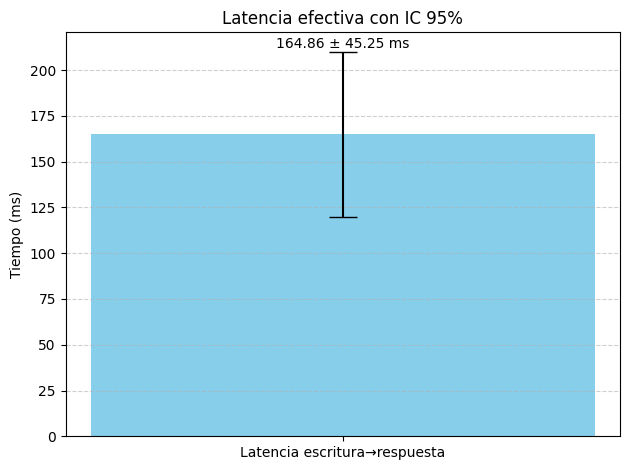

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Asegúrate de que haya datos
if latencias:
    # Calcular estadísticos
    latencias_np = np.array(latencias)
    media = np.mean(latencias_np)
    std_err = stats.sem(latencias_np)
    intervalo = std_err * stats.t.ppf(0.975, len(latencias_np) - 1)  # 95% IC

    # Gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(["Latencia escritura→respuesta"], [media], yerr=[intervalo], capsize=10, color='skyblue')
    ax.set_ylabel("Tiempo (ms)")
    ax.set_title("Latencia efectiva con IC 95%")

    # Mostrar valores sobre la barra
    ax.text(0, media + intervalo + 2, f"{media:.2f} ± {intervalo:.2f} ms", ha='center', fontsize=10)

    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()
else:
    print("No hay datos suficientes para graficar.")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


🔌 Conectado al servidor OPC UA
Iniciando prueba de 100 simulaciones de tecla '4'...
Simulando pulsación de tecla '4'
Timeout: no se detectó cambio
Simulando pulsación de tecla '4'
Timeout: no se detectó cambio
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 808.91 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 451.16 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 495.55 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 492.44 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 486.42 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 481.43 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 475.30 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 470.68 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 465.64 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 460.53 ms
Simulando pulsación de tecla '4'
Cambio detectado. Latencia: 451.90 ms
Simulando

ServiceFault from server received while waiting for publish response
ServiceFault from server received while waiting for publish response



Conexión cerrada.

Resultados:
Promedio: 477.16 ms
IC 95% : ±7.25 ms
Min/Max: 448.92 ms / 808.91 ms
✔️ Latencias guardadas en latencias_tecla_4-serverN2.csv


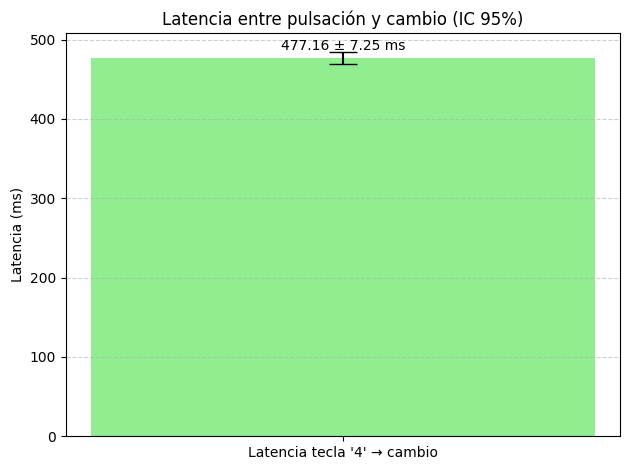

In [3]:
from opcua import Client, ua
from opcua.common import subscription
import keyboard
import time
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- Configuración ---
url = "opc.tcp://localhost:4840"
nodo_observado_id = "ns=1;s=CtrlBomba"  # Nodo que cambia tras la tecla
#url = "opc.tcp://10.21.162.10:4840"  #  URL del servidor OPC UA
#nodo_observado_id = "ns=1;i=1001"    # Nodo al que escribes (actuador)

INTERVALO_PULSACION = 2  # segundos
N_MUESTRAS = 100

# --- Variables globales ---
latencias = []
t0 = 0
esperando_cambio = False
ultimo_valor = None
muestras_realizadas = 0

# --- Clase para suscripción ---
class Handler:
    def datachange_notification(self, node, val, data):
        global esperando_cambio, t0, muestras_realizadas, ultimo_valor
        if esperando_cambio:
            if ultimo_valor is None or abs(val - ultimo_valor) > 0.01:
                t1 = time.time()
                latencia = (t1 - t0) * 1000
                latencias.append(latencia)
                print(f"Cambio detectado. Latencia: {latencia:.2f} ms")
                esperando_cambio = False
                muestras_realizadas += 1
            ultimo_valor = val

# --- Conexión OPC UA ---
client = Client(url)
client.connect()
print("🔌 Conectado al servidor OPC UA")

nodo_observado = client.get_node(nodo_observado_id)
handler = Handler()
sub = client.create_subscription(250, handler)
handle = sub.subscribe_data_change(nodo_observado)

sleep(2)
# --- Pruebas ---
print(f"Iniciando prueba de {N_MUESTRAS} simulaciones de tecla '4'...")

try:
    while muestras_realizadas < N_MUESTRAS:
        t0 = time.time()
        esperando_cambio = True
        print("Simulando pulsación de tecla '4'")
        keyboard.press_and_release('4')  # Aquí se activa la acción en Godot

        # Esperar hasta que se detecte el cambio o pase el tiempo máximo
        timeout = time.time() + 5  # 5 segundos para detectar el cambio
        while esperando_cambio and time.time() < timeout:
            sleep(0.05)

        if esperando_cambio:
            print("Timeout: no se detectó cambio")
            esperando_cambio = False

        sleep(INTERVALO_PULSACION)

finally:
    sub.unsubscribe(handle)
    sub.delete()
    client.disconnect()
    print("\nConexión cerrada.")

# --- Guardar resultados en archivo ---
def guardar_latencias(nombre_archivo, latencias):
    with open(nombre_archivo, 'w') as f:
        f.write("Latencia (ms)\n")
        for lat in latencias:
            f.write(f"{lat:.4f}\n")
    print(f"✔️ Latencias guardadas en {nombre_archivo}")

# --- Resultados ---
if latencias:
    media = np.mean(latencias)
    stderr = stats.sem(latencias)
    intervalo = stderr * stats.t.ppf(0.975, len(latencias) - 1)

    print(f"\nResultados:")
    print(f"Promedio: {media:.2f} ms")
    print(f"IC 95% : ±{intervalo:.2f} ms")
    print(f"Min/Max: {min(latencias):.2f} ms / {max(latencias):.2f} ms")

    # --- Gráfica de barra con IC 95% ---
    plt.figure()
    plt.bar(["Latencia tecla '4' → cambio"], [media], yerr=[intervalo], capsize=10, color='lightgreen')
    plt.ylabel("Latencia (ms)")
    plt.title("Latencia entre pulsación y cambio (IC 95%)")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.text(0, media + intervalo + 2, f"{media:.2f} ± {intervalo:.2f} ms", ha='center', fontsize=10)
    plt.tight_layout()
    guardar_latencias("latencias_tecla_4-serverN2.csv", latencias)
    plt.show()
else:
    print("No se registraron cambios.")


# Modo Cliente

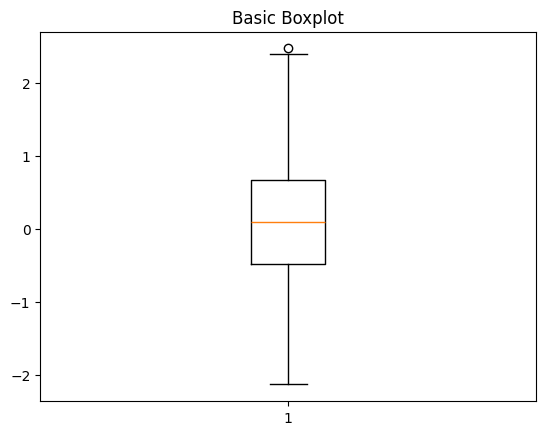

In [36]:
#imports Matplotlib library and assigns shorthand 'plt'
import matplotlib.pyplot as plt
#imports Seaborn library and assigns shorthand 'sns'
import seaborn as sns
#imports Plotly library and assigns shorthand 'px'
import plotly.express as px
# Generates some random dataset
np.random.seed(10) 
data = np.random.normal(0, 1, 100)
# Creates a boxplot
plt.boxplot(data) 
plt.title('Basic Boxplot') 
plt.show()

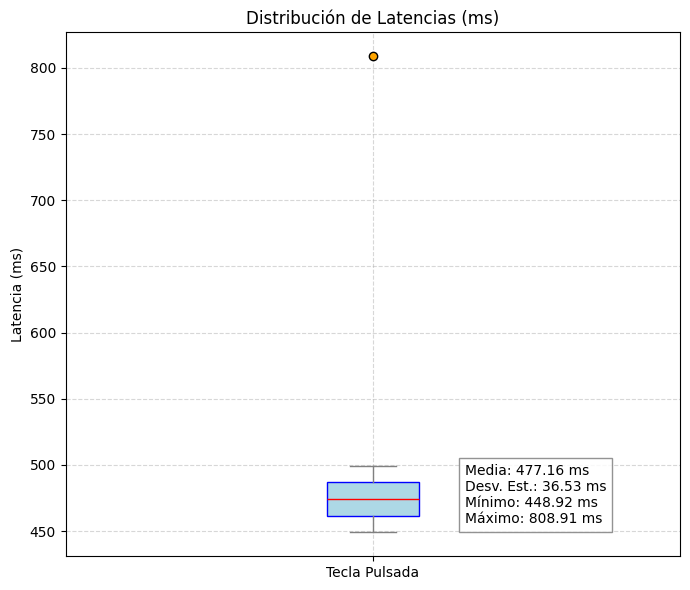

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar archivo CSV
archivo = "latencias_tecla_4-serverN2.csv"
df = pd.read_csv(archivo)
latencias = df["Latencia (ms)"]

# Calcular estadísticas
media = latencias.mean()
std = latencias.std()
minimo = latencias.min()
maximo = latencias.max()

# Crear boxplot
plt.figure(figsize=(7, 6))
plt.boxplot(latencias, vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            whiskerprops=dict(color="gray"),
            capprops=dict(color="gray"),
            flierprops=dict(markerfacecolor="orange", marker='o', markersize=6, linestyle='none'))

plt.title("Distribución de Latencias (ms)")
plt.ylabel("Latencia (ms)")
plt.xticks([1], ["Tecla Pulsada"])
plt.grid(True, linestyle='--', alpha=0.5)

# Agregar texto estadístico al lado derecho
texto = (
    f"Media: {media:.2f} ms\n"
    f"Desv. Est.: {std:.2f} ms\n"
    f"Mínimo: {minimo:.2f} ms\n"
    f"Máximo: {maximo:.2f} ms"
)

plt.text(1.15, media, texto, ha='left', va='center', fontsize=10,
         bbox=dict(facecolor='white', edgecolor='gray', alpha=0.85))

plt.tight_layout()
plt.show()


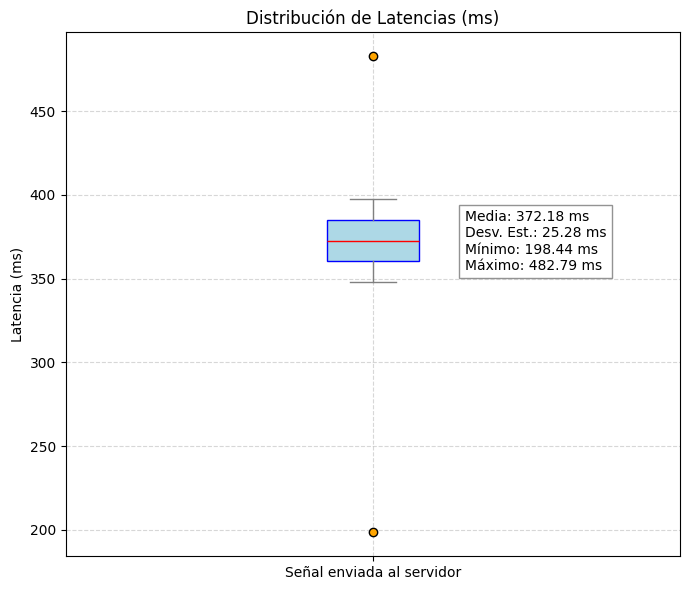

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar archivo CSV
archivo = "latencias-server-cltext2.csv"
df = pd.read_csv(archivo)
latencias = df["Latencia (ms)"]

# Calcular estadísticas
media = latencias.mean()
std = latencias.std()
minimo = latencias.min()
maximo = latencias.max()

# Crear boxplot
plt.figure(figsize=(7, 6))
plt.boxplot(latencias, vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            whiskerprops=dict(color="gray"),
            capprops=dict(color="gray"),
            flierprops=dict(markerfacecolor="orange", marker='o', markersize=6, linestyle='none'))

plt.title("Distribución de Latencias (ms)")
plt.ylabel("Latencia (ms)")
plt.xticks([1], ["Señal enviada al servidor"])
plt.grid(True, linestyle='--', alpha=0.5)

# Agregar texto estadístico al lado derecho
texto = (
    f"Media: {media:.2f} ms\n"
    f"Desv. Est.: {std:.2f} ms\n"
    f"Mínimo: {minimo:.2f} ms\n"
    f"Máximo: {maximo:.2f} ms"
)

plt.text(1.15, media, texto, ha='left', va='center', fontsize=10,
         bbox=dict(facecolor='white', edgecolor='gray', alpha=0.85))

plt.tight_layout()
plt.show()

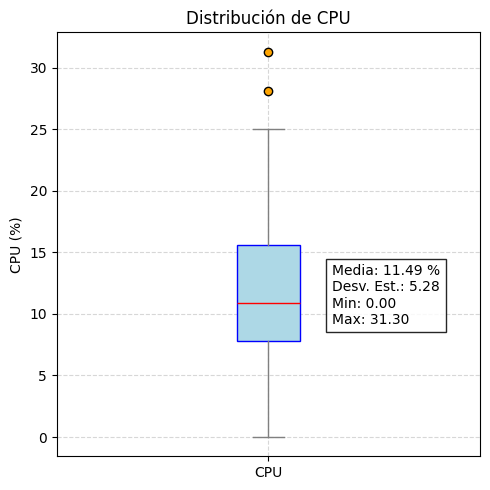

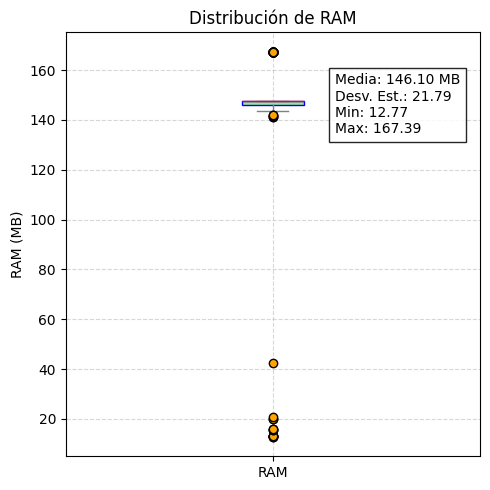

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
df = pd.read_csv("uso_cpu_ram_31528.csv")
cpu = df["CPU (%)"]
ram = df["RAM (MB)"]

# Función para generar cada boxplot
def graficar_boxplot(datos, etiqueta, color, unidad):
    media = datos.mean()
    std = datos.std()
    minimo = datos.min()
    maximo = datos.max()

    plt.figure(figsize=(5, 5))
    plt.boxplot(datos, patch_artist=True,
                boxprops=dict(facecolor=color, color="blue"),
                medianprops=dict(color="red"),
                whiskerprops=dict(color="gray"),
                capprops=dict(color="gray"),
                flierprops=dict(markerfacecolor="orange", marker='o', markersize=6, linestyle='none'))

    plt.title(f"Distribución de {etiqueta}")
    plt.ylabel(f"{etiqueta} ({unidad})")
    plt.xticks([1], [etiqueta])
    plt.grid(True, linestyle='--', alpha=0.5)

    texto = (
        f"Media: {media:.2f} {unidad}\n"
        f"Desv. Est.: {std:.2f}\n"
        f"Min: {minimo:.2f}\n"
        f"Max: {maximo:.2f}"
    )

    plt.text(1.15, media, texto, ha='left', va='center', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.85))

    plt.tight_layout()
    plt.show()

# Graficar por separado
graficar_boxplot(cpu, "CPU", "lightblue", "%")
graficar_boxplot(ram, "RAM", "lightgreen", "MB")


# Operacion

In [1]:
from opcua import Client
from datetime import datetime
import csv
import time
import os

# === CONFIGURACIÓN ===
URL = "opc.tcp://10.21.162.10:4840"        # Cambia por la IP y puerto de tu servidor
NODO_1_ID = "ns=1;i=1005"         # Reemplaza con el NodeId real
NODO_2_ID = "ns=1;i=1006"            # Reemplaza con el NodeId real
TIEMPO_EJECUCION = 120                 # Tiempo total en segundos
INTERVALO = 1.0                        # Intervalo entre lecturas (segundos)
CSV_FILE = "lecturas_opc_polling.csv"
APPEND_MODE = False                    # False: sobrescribir CSV, True: añadir

# === Conexión OPC UA ===
client = Client(URL)

try:
    # Usar administrador de contexto para manejar conexión/desconexión
    with client:
        print("✅ Conectado al servidor OPC UA")

        # Validar nodos
        nodo1 = client.get_node(NODO_1_ID)
        nodo2 = client.get_node(NODO_2_ID)
 #       if not (nodo1.is_readable() and nodo2.is_readable()):
  #        raise ValueError("Uno o más nodos no son accesibles")

        # Abrir CSV
        mode = 'a' if APPEND_MODE and os.path.exists(CSV_FILE) else 'w'
        with open(CSV_FILE, mode=mode, newline='') as archivo:
            writer = csv.writer(archivo)
            if mode == 'w' or not os.path.exists(CSV_FILE):
                writer.writerow(["TimestampLocal", "Valor_1", "Valor_2"])

            print(f"⌛ Leyendo cada {INTERVALO} s por {TIEMPO_EJECUCION} s...")
            start = time.time()
            while (time.time() - start) < TIEMPO_EJECUCION:
                timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")
                try:
                    val1 = nodo1.get_value()
                    val2 = nodo2.get_value()
                    val1 = str(val1) if val1 is not None else "N/A"
                    val2 = str(val2) if val2 is not None else "N/A"
                    writer.writerow([timestamp, val1, val2])
                    print(f"[{timestamp}] Var1: {val1} | Var2: {val2}")
                except Exception as e:
                    print(f"⚠️ Error al leer nodos: {e}")
                time.sleep(INTERVALO)

        print("✅ Lectura finalizada y CSV guardado.")

except Exception as e:
    print("❌ Error:", e)

finally:
    # La desconexión se maneja automáticamente por el contexto 'with'
    print("🔌 Desconectado del servidor OPC UA.")

Requested secure channel timeout to be 3600000ms, got 600000ms instead


✅ Conectado al servidor OPC UA
⌛ Leyendo cada 1.0 s por 120 s...
[2025-06-18 11:17:20.410517] Var1: 1.559999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:21.474192] Var1: 1.559999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:22.497377] Var1: 3.059999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:23.546834] Var1: 3.31000018119812 | Var2: 6.440000057220459
[2025-06-18 11:17:24.568821] Var1: 1.559999942779541 | Var2: 6.700000286102295
[2025-06-18 11:17:25.589235] Var1: 1.559999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:26.657571] Var1: 1.559999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:27.718706] Var1: 3.059999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:28.746213] Var1: 1.8100000619888306 | Var2: 6.700000286102295
[2025-06-18 11:17:29.857576] Var1: 1.559999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:30.878290] Var1: 1.559999942779541 | Var2: 6.440000057220459
[2025-06-18 11:17:31.925150] Var1: 3.059999942779541 | Var2: 8.569

KeyboardInterrupt: 

In [2]:
from opcua import Client
from datetime import datetime
import csv
import time
import os
import keyboard  # Necesario: pip install keyboard
from time import sleep


# === CONFIGURACIÓN ===
URL = "opc.tcp://10.21.162.10:4840"
NODO_1_ID = "ns=1;i=1005"
NODO_2_ID = "ns=1;i=1006"
TIEMPO_EJECUCION = 120                 # Segundos totales
INTERVALO = 1.0                        # Intervalo entre lecturas
CSV_FILE = "lecturas_opc_polling3.csv"
APPEND_MODE = False

# === Conexión OPC UA ===
client = Client(URL)
sleep(3.0)
try:
    with client:
        print("✅ Conectado al servidor OPC UA")
        nodo1 = client.get_node(NODO_1_ID)
        nodo2 = client.get_node(NODO_2_ID)

        mode = 'a' if APPEND_MODE and os.path.exists(CSV_FILE) else 'w'
        with open(CSV_FILE, mode=mode, newline='') as archivo:
            writer = csv.writer(archivo)
            if mode == 'w' or not os.path.exists(CSV_FILE):
                writer.writerow(["TimestampLocal", "Valor_1", "Valor_2"])

            print(f"⌛ Leyendo cada {INTERVALO} s por {TIEMPO_EJECUCION} s...")
            start = time.time()

            while (time.time() - start) < TIEMPO_EJECUCION:
                now = time.time()
                elapsed = now - start
                timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")

                # Simular pulsaciones de teclas en momentos específicos
                if int(elapsed) % 8 == 0:
                    keyboard.press_and_release('4')
                    print(f"⬇️ Tecla '4' simulada")
                if int(elapsed) % 10 == 0:
                    keyboard.press_and_release('5')
                    print(f"⬇️ Tecla '5' simulada")
                if int(elapsed) % 12 == 0:
                    keyboard.press_and_release('6')
                    print(f"⬇️ Tecla '6' simulada")

                try:
                    val1 = nodo1.get_value()
                    val2 = nodo2.get_value()
                    val1 = str(val1) if val1 is not None else "N/A"
                    val2 = str(val2) if val2 is not None else "N/A"
                    writer.writerow([timestamp, val1, val2])
                    print(f"[{timestamp}] Var1: {val1} | Var2: {val2}")
                except Exception as e:
                    print(f"⚠️ Error al leer nodos: {e}")

                time.sleep(INTERVALO)

        print("✅ Lectura finalizada y CSV guardado.")

except Exception as e:
    print("❌ Error:", e)

finally:
    print("🔌 Desconectado del servidor OPC UA.")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


✅ Conectado al servidor OPC UA
⌛ Leyendo cada 1.0 s por 120 s...
⬇️ Tecla '4' simulada
⬇️ Tecla '5' simulada
⬇️ Tecla '6' simulada
[2025-06-18 11:18:42.729373] Var1: 1.3100000619888306 | Var2: 8.569999694824219
[2025-06-18 11:18:43.884586] Var1: 1.3100000619888306 | Var2: 6.700000286102295
[2025-06-18 11:18:44.990684] Var1: 1.3100000619888306 | Var2: 7.240000247955322
[2025-06-18 11:18:46.041858] Var1: 1.8100000619888306 | Var2: 6.970000267028809
[2025-06-18 11:18:47.063578] Var1: 2.309999942779541 | Var2: 6.970000267028809
[2025-06-18 11:18:48.084046] Var1: 2.81000018119812 | Var2: 7.240000247955322
[2025-06-18 11:18:49.153413] Var1: 3.31000018119812 | Var2: 7.240000247955322
[2025-06-18 11:18:50.216382] Var1: 4.809999942779541 | Var2: 7.240000247955322
⬇️ Tecla '4' simulada
[2025-06-18 11:18:51.261972] Var1: 3.559999942779541 | Var2: 5.369999885559082
[2025-06-18 11:18:52.384128] Var1: 3.809999942779541 | Var2: 7.240000247955322
⬇️ Tecla '5' simulada
[2025-06-18 11:18:53.486949] Var1

In [ ]:
from opcua import Client
from datetime import datetime
import csv
import time
import os
import keyboard  # Necesario: pip install keyboard
from time import sleep


# === CONFIGURACIÓN ===
URL = "opc.tcp://10.21.162.10:4840"
#alturas  tanque 1 y 2
NODO_1_ID = "ns=1;i=1005"
NODO_2_ID = "ns=1;i=1006"
# caudales
NODO_3_ID = "ns=1,i=1007" # Qin
NODO_4_ID = "ns=1,i=1008" # Qout
NODO_5_ID = "ns=1,i=1009" # Qint
# Valvulas
NODO_6_ID = "ns=1,i=1001" # Bomba
NODO_7_ID = "ns=1,i=1003" # SOlenoide
NODO_8_ID = "ns=1,i=1004" # Bola
TIEMPO_EJECUCION = 120                 # Segundos totales
INTERVALO = 1.0                        # Intervalo entre lecturas
CSV_FILE = "lecturas_opc_polling3.csv"
APPEND_MODE = False

# === Conexión OPC UA ===
client = Client(URL)
sleep(3.0)
try:
    with client:
        print("✅ Conectado al servidor OPC UA")
        nodo1 = client.get_node(NODO_1_ID)
        nodo2 = client.get_node(NODO_2_ID)

        mode = 'a' if APPEND_MODE and os.path.exists(CSV_FILE) else 'w'
        with open(CSV_FILE, mode=mode, newline='') as archivo:
            writer = csv.writer(archivo)
            if mode == 'w' or not os.path.exists(CSV_FILE):
                writer.writerow(["TimestampLocal", "Valor_1", "Valor_2"])

            print(f"⌛ Leyendo cada {INTERVALO} s por {TIEMPO_EJECUCION} s...")
            start = time.time()

            while (time.time() - start) < TIEMPO_EJECUCION:
                now = time.time()
                elapsed = now - start
                timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")

                # Simular pulsaciones de teclas en momentos específicos
                if int(elapsed) % 8 == 0:
                    keyboard.press_and_release('4')
                    print(f"⬇️ Tecla '4' simulada")
                if int(elapsed) % 10 == 0:
                    keyboard.press_and_release('5')
                    print(f"⬇️ Tecla '5' simulada")
                if int(elapsed) % 12 == 0:
                    keyboard.press_and_release('6')
                    print(f"⬇️ Tecla '6' simulada")

                try:
                    val1 = nodo1.get_value()
                    val2 = nodo2.get_value()
                    val1 = str(val1) if val1 is not None else "N/A"
                    val2 = str(val2) if val2 is not None else "N/A"
                    writer.writerow([timestamp, val1, val2])
                    print(f"[{timestamp}] Var1: {val1} | Var2: {val2}")
                except Exception as e:
                    print(f"⚠️ Error al leer nodos: {e}")

                time.sleep(INTERVALO)

        print("✅ Lectura finalizada y CSV guardado.")

except Exception as e:
    print("❌ Error:", e)

finally:
    print("🔌 Desconectado del servidor OPC UA.")


In [ ]:
from opcua import Client
from datetime import datetime
import csv
import time
import os
import keyboard
from time import sleep

# === CONFIGURACIÓN ===
URL = "opc.tcp://10.21.162.10:4840"
NODO_1_ID = "ns=1;i=1005"
NODO_2_ID = "ns=1;i=1006"
# caudales
NODO_3_ID = "ns=1;i=1007" # Qin
NODO_4_ID = "ns=1;i=1008" # Qout
NODO_5_ID = "ns=1;i=1009" # Qint
# Valvulas
NODO_6_ID = "ns=1;i=1001" # Bomba
NODO_7_ID = "ns=1;i=1003" # SOlenoide
NODO_8_ID = "ns=1;i=1004" # Bola
TIEMPO_EJECUCION = 20          # Segundos totales
CSV_FILE = "lecturas_promedio1.csv"
APPEND_MODE = False

INTERVALO_INTERNO = 1 / 1      # Polling cada ~0.333 segundos
LECTURAS_POR_SEGUNDO = 1

client = Client(URL)
sleep(1.0)

try:
    with client:
        print("✅ Conectado al servidor OPC UA")
        nodo1 = client.get_node(NODO_1_ID)
        nodo2 = client.get_node(NODO_2_ID)
        nodo3 = client.get_node(NODO_3_ID)
        nodo4 = client.get_node(NODO_4_ID)
        nodo5 = client.get_node(NODO_5_ID)
        nodo6 = client.get_node(NODO_6_ID)
        nodo7 = client.get_node(NODO_7_ID)
        nodo8 = client.get_node(NODO_8_ID)

        mode = 'a' if APPEND_MODE and os.path.exists(CSV_FILE) else 'w'
        with open(CSV_FILE, mode=mode, newline='') as archivo:
            writer = csv.writer(archivo)
            if mode == 'w' or not os.path.exists(CSV_FILE):
                writer.writerow(["TimestampLocal", "Valor_1", "Valor_2", "CtrlBomba", "CtrlSValve", "CtrlBValve", "Qin", "Qout", "Qint"])

            print(f"⌛ Promediando cada {LECTURAS_POR_SEGUNDO} lecturas por segundo durante {TIEMPO_EJECUCION} segundos...")
            start = time.time()
            segundo_actual = 0

            while (time.time() - start) < TIEMPO_EJECUCION:
                while (time.time() - start) < TIEMPO_EJECUCION:
                    vals_1 = []
                    vals_2 = []

                    # Leer nodos menos variables 1 vez al inicio del segundo
                    try:
                        val3 = float(nodo3.get_value())  # Qin
                        val4 = float(nodo4.get_value())  # Qout
                        val5 = float(nodo5.get_value())  # Qint
                        val6 = float(nodo6.get_value())  # Bomba
                        val7 = float(nodo7.get_value())  # Solenoide
                        val8 = float(nodo8.get_value())  # Bola
                    except Exception as e:
                        print(f"⚠️ Error al leer nodos 3-8: {e}")
                        val3 = val4 = val5 = val6 = val7 = val8 = 0.0

                    # Realizar LECTURAS_POR_SEGUNDO de los niveles
                    for _ in range(LECTURAS_POR_SEGUNDO):
                        try:
                            vals_1.append(float(nodo1.get_value()))
                            vals_2.append(float(nodo2.get_value()))
                        except Exception as e:
                            print(f"⚠️ Error al leer nodos 1-2: {e}")
                            vals_1.append(0.0)
                            vals_2.append(0.0)
                        time.sleep(INTERVALO_INTERNO)

                    # Calcular promedios de niveles
                    promedio_1 = sum(vals_1) / len(vals_1)
                    promedio_2 = sum(vals_2) / len(vals_2)

                    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                    writer.writerow([timestamp, promedio_1, promedio_2, val6, val7, val8, val3, val4, val5])
                    print(f"[{timestamp}] Prom -> Nivel1:{promedio_1:.2f} | Nivel2:{promedio_2:.2f} | Qin:{val3:.2f} | Qout:{val4:.2f} | Qint:{val5:.2f}")



        print("✅ Lectura finalizada y CSV guardado.")

except Exception as e:
    print("❌ Error:", e)

finally:
    print("🔌 Desconectado del servidor OPC UA.")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


✅ Conectado al servidor OPC UA
⌛ Promediando cada 1 lecturas por segundo durante 20 segundos...
[2025-06-18 13:25:43] Prom -> Nivel1:20.30 | Nivel2:-0.24 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:44] Prom -> Nivel1:20.30 | Nivel2:2.16 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:45] Prom -> Nivel1:20.30 | Nivel2:2.16 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:46] Prom -> Nivel1:20.30 | Nivel2:2.16 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:48] Prom -> Nivel1:20.30 | Nivel2:2.16 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:49] Prom -> Nivel1:20.30 | Nivel2:1.89 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:50] Prom -> Nivel1:20.30 | Nivel2:1.89 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:51] Prom -> Nivel1:20.30 | Nivel2:2.16 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:52] Prom -> Nivel1:20.30 | Nivel2:1.89 | Qin:0.00 | Qout:0.00 | Qint:0.00
[2025-06-18 13:25:53] Prom -> Nivel1:20.30 | Nivel2:0.29 | Qin:0.00 | Qout:

🟢 Nodo 7 (Solenoide) estado cambiado a 1
🟢 Nodo 8 (Bola) estado cambiado a 1
🟢 Nodo 7 (Solenoide) estado cambiado a 0
🟢 Nodo 7 (Solenoide) estado cambiado a 1
🟢 Nodo 7 (Solenoide) estado cambiado a 0
🟢 Nodo 7 (Solenoide) estado cambiado a 1
🟢 Nodo 7 (Solenoide) estado cambiado a 0
🟢 Nodo 6 (Bomba) estado cambiado a 0
🟢 Nodo 6 (Bomba) estado cambiado a 1
🟢 Nodo 6 (Bomba) estado cambiado a 0
🟢 Nodo 6 (Bomba) estado cambiado a 1
🟢 Nodo 6 (Bomba) estado cambiado a 0
🟢 Nodo 6 (Bomba) estado cambiado a 1
🟢 Nodo 6 (Bomba) estado cambiado a 0
🟢 Nodo 6 (Bomba) estado cambiado a 1
🟢 Nodo 6 (Bomba) estado cambiado a 0
🟢 Nodo 6 (Bomba) estado cambiado a 1
🟢 Nodo 8 (Bola) estado cambiado a 0
🟢 Nodo 8 (Bola) estado cambiado a 1
🟢 Nodo 8 (Bola) estado cambiado a 0


In [32]:
from opcua import Client
from datetime import datetime
import csv
import time
import os
import keyboard  # pip install keyboard
from time import sleep

# === CONFIGURACIÓN ===
URL = "opc.tcp://10.21.162.10:4840"

# IDs de nodos OPC UA
NODO_1_ID = "ns=1;i=1005"  # altura tanque 1
NODO_2_ID = "ns=1;i=1006"  # altura tanque 2
NODO_3_ID = "ns=1;i=1007"  # Qin
NODO_4_ID = "ns=1;i=1008"  # Qout
NODO_5_ID = "ns=1;i=1009"  # Qint

TIEMPO_EJECUCION = 720                  # Segundos totales
CSV_FILE = "lecturas_simuladas6.csv"
APPEND_MODE = False

INTERVALO_INTERNO = 1 / 3              # Polling cada 0.333 segundos
LECTURAS_POR_SEGUNDO = 3

# Estados iniciales de los controles simulados
ctrl_bomba = 0
ctrl_svalve = 0
ctrl_bvalve = 0

# División de fases
fase_duracion = TIEMPO_EJECUCION / 5
fase_2_inicio = fase_duracion
fase_2_fin = 4 * fase_duracion
fase_4_inicio = TIEMPO_EJECUCION - fase_duracion

# Timers de teclas
ultimo_4 = -99
ultimo_5 = -99
ultimo_6 = -99

# Conectar cliente
client = Client(URL)
sleep(6.0)

try:
    with client:
        print("✅ Conectado al servidor OPC UA")

        # Obtener nodos
        nodo1 = client.get_node(NODO_1_ID)
        nodo2 = client.get_node(NODO_2_ID)
        nodo3 = client.get_node(NODO_3_ID)
        nodo4 = client.get_node(NODO_4_ID)
        nodo5 = client.get_node(NODO_5_ID)

        # Preparar CSV
        mode = 'a' if APPEND_MODE and os.path.exists(CSV_FILE) else 'w'
        with open(CSV_FILE, mode=mode, newline='') as archivo:
            writer = csv.writer(archivo)
            if mode == 'w' or not os.path.exists(CSV_FILE):
                writer.writerow([
                    "TimestampLocal", "Nivel1", "Nivel2",
                    "CtrlBomba", "CtrlSValve", "CtrlBValve",
                    "Qin", "Qout", "Qint"
                ])

            print("⌛ Iniciando simulación...")

            start = time.time()
            while (time.time() - start) < TIEMPO_EJECUCION:
                elapsed = time.time() - start
                seg = int(elapsed)

                # === FASES DE SIMULACIÓN ===
                if fase_2_inicio <= elapsed < fase_2_fin:
                    if seg - ultimo_4 >= 15:
                        ctrl_bomba = 1 - ctrl_bomba
                        keyboard.press_and_release('4')
                        ultimo_4 = seg
                        print("⬇️ Tecla 4 simulada")

                    if seg - ultimo_5 >= 5:
                        ctrl_svalve = 1 - ctrl_svalve
                        keyboard.press_and_release('5')
                        ultimo_5 = seg
                        print("⬇️ Tecla 5 simulada")

                    if seg - ultimo_6 >= 10:
                        ctrl_bvalve = 1 - ctrl_bvalve
                        keyboard.press_and_release('6')
                        ultimo_6 = seg
                        print("⬇️ Tecla 6 simulada")

                elif elapsed >= fase_4_inicio:
                    # Última fase: poner todo en 0 una vez
                    if ctrl_bomba != 0 or ctrl_svalve != 0 or ctrl_bvalve != 0:
                        ctrl_bomba = ctrl_svalve = ctrl_bvalve = 0
                        if ctrl_bomba != 0:
                            keyboard.press_and_release('4')
                        if ctrl_bvalve != 0:
                            keyboard.press_and_release('6')
                        if ctrl_svalve != 0:
                            keyboard.press_and_release('5')
                        print("🔁 Reset final de controles: B=0, S=0, V=0")

                # Leer caudales
                try:
                    val_qin = float(nodo3.get_value())
                    val_qout = float(nodo4.get_value())
                    val_qint = float(nodo5.get_value())
                except Exception as e:
                    print(f"⚠️ Error al leer caudales: {e}")
                    val_qin = val_qout = val_qint = 0.0

                # Promediar niveles
                vals_1 = []
                vals_2 = []
                for _ in range(LECTURAS_POR_SEGUNDO):
                    try:
                        vals_1.append(float(nodo1.get_value()))
                        vals_2.append(float(nodo2.get_value()))
                    except Exception as e:
                        print(f"⚠️ Error al leer niveles: {e}")
                        vals_1.append(0.0)
                        vals_2.append(0.0)
                    time.sleep(INTERVALO_INTERNO)

                promedio_1 = sum(vals_1) / len(vals_1)
                promedio_2 = sum(vals_2) / len(vals_2)

                timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")[:-3]
                writer.writerow([
                    timestamp, promedio_1, promedio_2,
                    ctrl_bomba, ctrl_svalve, ctrl_bvalve,
                    val_qin, val_qout, val_qint
                ])

                print(f"[{timestamp}] Niveles: {promedio_1:.2f}, {promedio_2:.2f} | B: {ctrl_bomba} S: {ctrl_svalve} V: {ctrl_bvalve}")

        print("✅ Finalizado y datos guardados.")

except Exception as e:
    print("❌ Error:", e)

finally:
    print("🔌 Desconectado del servidor OPC UA.")


Requested secure channel timeout to be 3600000ms, got 600000ms instead


✅ Conectado al servidor OPC UA
⌛ Iniciando simulación...
[2025-06-18 16:48:44.340] Niveles: 22.13, 32.70 | B: 0 S: 0 V: 0
[2025-06-18 16:48:45.525] Niveles: 22.05, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:48:46.723] Niveles: 22.22, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:48:47.941] Niveles: 22.13, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:48:49.223] Niveles: 22.30, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:48:50.441] Niveles: 22.05, 32.88 | B: 0 S: 0 V: 0
[2025-06-18 16:48:51.718] Niveles: 22.05, 32.88 | B: 0 S: 0 V: 0
[2025-06-18 16:48:52.939] Niveles: 22.13, 32.35 | B: 0 S: 0 V: 0
[2025-06-18 16:48:54.218] Niveles: 22.30, 32.17 | B: 0 S: 0 V: 0
[2025-06-18 16:48:55.440] Niveles: 22.30, 32.35 | B: 0 S: 0 V: 0
[2025-06-18 16:48:56.720] Niveles: 22.22, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:48:57.938] Niveles: 22.05, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:48:59.220] Niveles: 22.22, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:49:00.441] Niveles: 22.05, 32.61 | B: 0 S: 0 V: 0
[2025-06-18 16:49:01.720] Niveles

🟢 Nodo 8 (Bola) estado cambiado a 1
